In [31]:
%matplotlib inline
import matplotlib as mpl
from matplotlib.collections import PolyCollection
from matplotlib.patches import Polygon as MPolygon
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import dxfasc
import dxfgrabber

In [32]:
import os

test_dir = '/Users/nik/Dropbox/test/dxf'

In [33]:
f = os.path.join(test_dir, 'gdcr4_6_fm.dxf')
dxf = dxfgrabber.readfile(f)
layers = dxfasc.get_layer_names(dxf)
for l in layers:
    print l

0
CR_ALIGN
FM_Q4
FM_Q5
FM_Q6


In [34]:
q4_verts = dxfasc.get_vertices(dxf, 'FM_Q4')

(-50, 50)

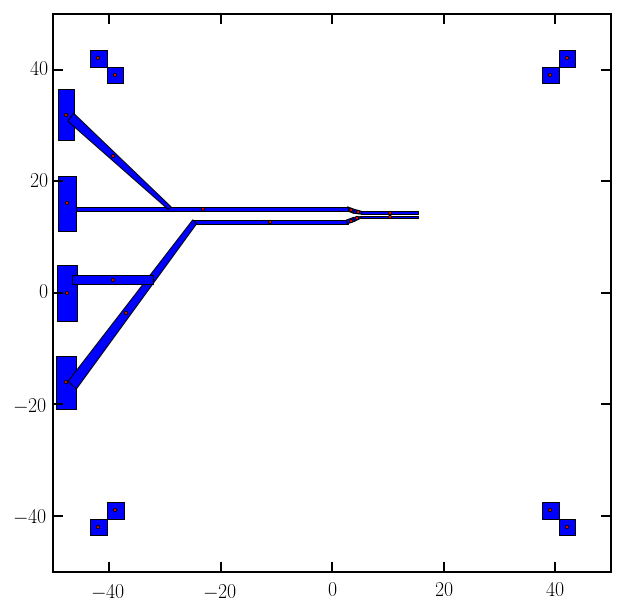

In [35]:
#create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#create polyCollection
polycol = PolyCollection(q4_verts)
ax.add_collection(polycol)

#add red markers for center of mass coordinates
q4_com = dxfasc.polyUtility(q4_verts, dxfasc.polyCOM)
CX, CY = [list(com) for com in zip(*q4_com)]
ax.scatter(CX, CY, s = 10, c = 'r')

#scale plot
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
#ax.autoscale_view(True, True, True)

#plot and save
#fig.savefig('dxf_import_plot.png')

In [36]:
doses = dxfasc.geometry_to_dose(q4_verts, 900, 1600)

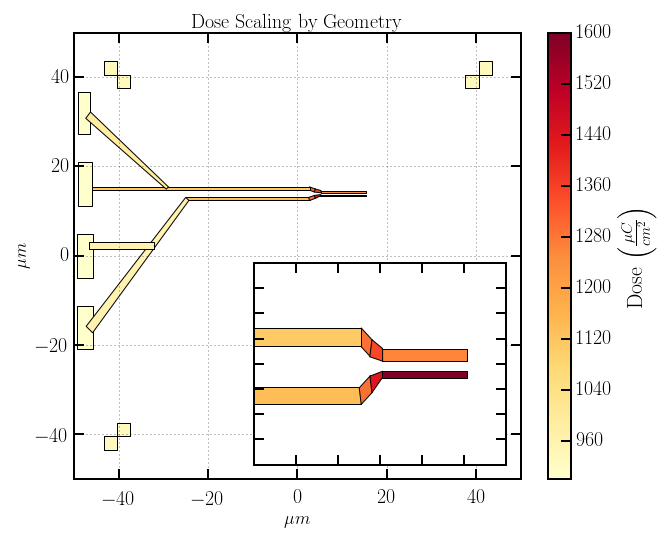

In [64]:
# SHOW FULL DEVICE WITH INSET OF NANOTUBE CONTACTS

#create figure
fig, ax = plt.subplots()

#create polyCollection
polycol = PolyCollection(q4_verts, array = doses, cmap = mpl.cm.YlOrRd)
ax.add_collection(polycol)

#add red markers for center of mass coordinates
q4_com = dxfasc.polyUtility(q4_verts, dxfasc.polyCOM)
CX, CY = [list(com) for com in zip(*q4_com)]
#ax.scatter(CX, CY, s = 10, c = 'r')

#scale plot
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.grid()
ax.set_title('Dose Scaling by Geometry')
ax.set_xlabel('$\mu m$')
ax.set_ylabel('$\mu m$')
# ax.autoscale_view(True, True, True)

polycol_small = PolyCollection(q4_verts, array = doses, cmap = mpl.cm.YlOrRd)
axin=fig.add_axes([0.375,0.15,0.35,0.35])
axin.add_collection(polycol_small)
axin.set_xticklabels([])
axin.set_yticklabels([])
axin.set_xlim(-10,20)
axin.set_ylim(10,18)
#add text
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# text = ['{0:.0f}'.format(dose) for dose in doses]
# for i in range(len(text)):
#     if np.logical_and(CX[i]>=xlim[0], CX[i]<=xlim[1]) and np.logical_and(CY[i]>=ylim[0], CY[i]<=ylim[1]):
#         ax.text(CX[i], CY[i], text[i])

#add colorbar
cb = fig.colorbar(polycol, ax=ax)
cb.set_label(r'Dose $\left(\frac{\mu C}{cm^2}\right)$', fontsize = 22)

#plot and save
fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/dose_scaling.png', dpi=300)